# Time series atrix profile
> Brute force implementation, O(n^2m)

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Time Series Data
We will download the Steamgen dataset from the stumpy library

In [2]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


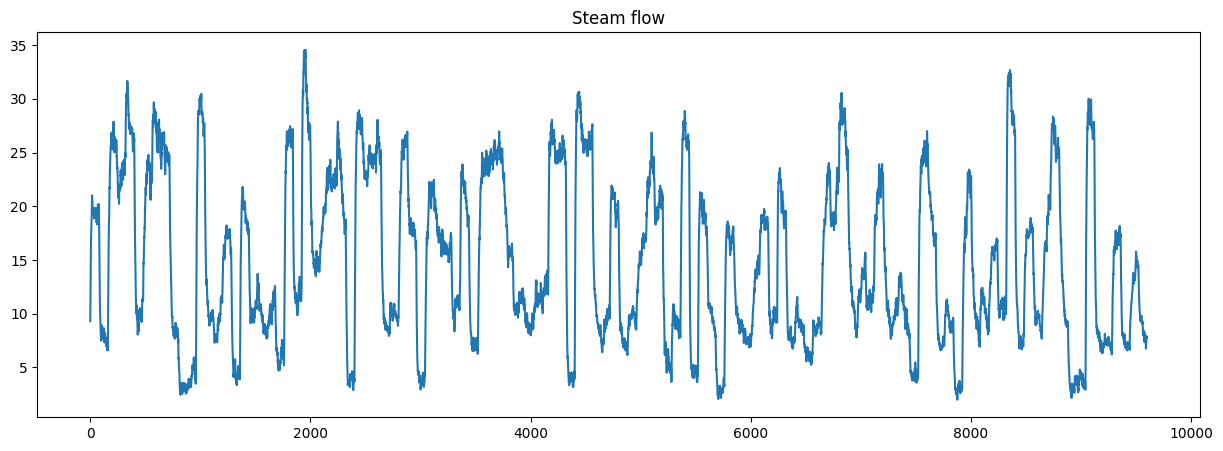

In [3]:
# We are interested in the 'steam flow' column
time_series_data = steam_df['steam flow'].values

# Plot the time series data
plt.figure(figsize=(15,5))
plt.plot(time_series_data)
plt.title('Steam flow')
plt.show()

# Implement Matrix Profile Algorithm
Implement the matrix profile algorithm, which involves calculating the z-normalized Euclidean distance between each subsequence in the time series.

In [4]:
# Define the function to calculate the z-normalized Euclidean distance
def z_normalized_euclidean_distance(subsequence_1, subsequence_2):
    mean_1 = np.mean(subsequence_1)
    mean_2 = np.mean(subsequence_2)
    std_1 = np.std(subsequence_1)
    std_2 = np.std(subsequence_2)
    z_normalized_subsequence_1 = (subsequence_1 - mean_1) / std_1
    z_normalized_subsequence_2 = (subsequence_2 - mean_2) / std_2
    distance = np.linalg.norm(z_normalized_subsequence_1 - z_normalized_subsequence_2)
    return distance

# Define the function to calculate the matrix profile
def calculate_matrix_profile(time_series_data, subsequence_length):
    matrix_profile = np.zeros(len(time_series_data) - subsequence_length + 1)
    for i in range(len(time_series_data) - subsequence_length + 1):
        subsequence_1 = time_series_data[i:i+subsequence_length]
        min_distance = float('inf')
        for j in range(i+1, len(time_series_data) - subsequence_length + 1):
            subsequence_2 = time_series_data[j:j+subsequence_length]
            distance = z_normalized_euclidean_distance(subsequence_1, subsequence_2)
            if distance < min_distance:
                min_distance = distance
        matrix_profile[i] = min_distance
    return matrix_profile

# Calculate the matrix profile
subsequence_length = 640 # given in stumpy
matrix_profile = calculate_matrix_profile(time_series_data, subsequence_length)

# Plot the matrix profile
plt.figure(figsize=(10,5))
plt.plot(matrix_profile)
plt.title('Matrix Profile')
plt.show()

# Find motifs and anomalies
Use the implemented matrix profile algorithm to calculate the matrix profile for the defined time series data.

In [1]:
# Define the function to find motifs in the time series data
def find_motifs(matrix_profile, num_motifs):
    motifs_indices = matrix_profile.argsort()[:num_motifs]
    return motifs_indices

# Find the top 5 motifs in the time series data
num_motifs = 5
motifs_indices = find_motifs(matrix_profile, num_motifs)

# Plot the time series data and the motifs
plt.figure(figsize=(10,5))
plt.plot(time_series_data)
for motif in motifs_indices:
    plt.plot(range(motif, motif+subsequence_length), time_series_data[motif:motif+subsequence_length], 'r')
plt.title('Time Series Data with Motifs')
plt.show()

NameError: name 'matrix_profile' is not defined

# Visualize Matrix Profile
Use Matplotlib to visualize the calculated matrix profile and the original time series data.

In [ ]:
# Define the function to visualize the matrix profile and the original time series data
def visualize_matrix_profile(time_series_data, matrix_profile):
    # Create a subplot with 2 rows and 1 column
    fig, axs = plt.subplots(2, 1, figsize=(15,10))

    # Plot the original time series data on the first row
    axs[0].plot(time_series_data)
    axs[0].set_title('Original Time Series Data')

    # Plot the matrix profile on the second row
    axs[1].plot(matrix_profile)
    axs[1].set_title('Matrix Profile')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Visualize the matrix profile and the original time series data
visualize_matrix_profile(time_series_data, matrix_profile)